In [1]:
import nmm
from qutip import sigmaz,sigmax,sigmay,Qobj
import numpy as np

In [2]:
bath=nmm.OverdampedBath(coupling=0.05,cutoff=5,T=1)

In [3]:
w,w1=1,2
t=np.linspace(0,10,1000)

In [4]:
cc=nmm.cumulant.csolve(Hsys=sigmaz()/2,baths=[bath],t=t,Qs=[(sigmax()+sigmay()+sigmaz())],eps=1e-6,cython=False)
cc_c=nmm.cumulant.csolve(Hsys=sigmaz()/2,baths=[bath],t=t,Qs=[(sigmax()+sigmay()+sigmaz())],eps=1e-6,cython=True)

In [5]:
ans=cc_c.Γgen(cc_c.baths[0],w,w1,t)

/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (s

In [6]:
ans2=cc.Γgen(bath,w,w1,t)

In [7]:
rho0=0.5*Qobj([[1,1],[1,1]])

In [8]:
Hsys=sigmaz()/2

In [10]:
%timeit w_cython=cc_c.evolution(rho0)

Calculating Integrals ...:   0%|          | 0/9 [00:00<?, ?it/s]

Computing Exponential of Generators . . . .: 100%|██████████| 1000/1000 [00:00<00:00, 8553.82it/s]

14.7 s ± 444 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
w_cython=cc_c.evolution(rho0)

Calculating Integrals ...:   0%|          | 0/9 [00:00<?, ?it/s]/home/mcditoos/miniconda3/envs/nm/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
Calculating Integrals ...:  11%|█         | 1/9 [00:01<00:15,  1.93s/it]/home/mcditoos/miniconda3/envs/nm/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to ana

In [11]:
%timeit with_cython=cc.evolution(rho0)

Computing Exponential of Generators . . . .: 100%|██████████| 1000/1000 [00:00<00:00, 9042.61it/s]

2min 47s ± 2.86 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
with_cython=cc.evolution(rho0)

Computing Exponential of Generators . . . .: 100%|██████████| 1000/1000 [00:00<00:00, 7347.72it/s]


In [20]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [24]:
%lprun -f cc_c.generator w_cython=cc_c.generator()

Calculating Integrals ...:   0%|          | 0/9 [00:00<?, ?it/s]/home/mcditoos/miniconda3/envs/nm/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
Calculating Integrals ...:  11%|█         | 1/9 [00:02<00:19,  2.44s/it]/home/mcditoos/miniconda3/envs/nm/lib/python3.12/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to ana

Timer unit: 1e-09 s

Total time: 21.7329 s
File: /home/mcditoos/github/NonMarkovianMethods/nmm/cumulant/cumulant.py
Function: generator at line 142

Line #      Hits         Time  Per Hit   % Time  Line Contents
   142                                               def generator(self, approximated=False):
   143         1       3537.0   3537.0      0.0          if type(self.Hsys) != np.ndarray:
   144         1     915913.0 915913.0      0.0              evals, all_state = self.Hsys.eigenstates()
   145                                                   else:
   146                                                       evals, all_state = np.linalg.eig(self.Hsys)
   147                                                       all_state = [i.reshape((len(i), 1)) for i in all_state]
   148         1        325.0    325.0      0.0          generators=[]
   149         2       3195.0   1597.5      0.0          for Q,bath in zip(self.Qs,self.baths):
   150         1        265.0    265.0      0.0

In [13]:
def population(den, a, b):
    return [den[i][a, b] for i in range(len(den))]

In [14]:
import matplotlib.pyplot as plt

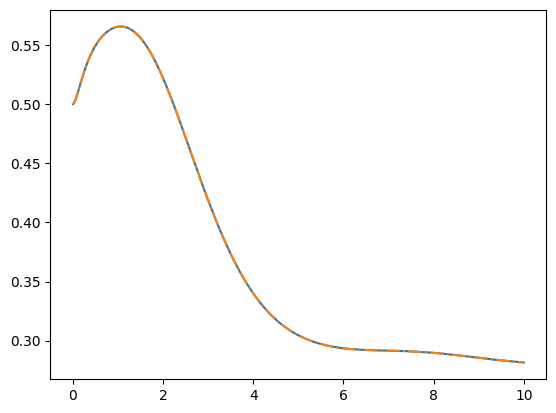

In [18]:
i,j=0,0
plt.plot(t,np.abs(population(w_cython,i,j)))
plt.plot(t,np.abs(population(with_cython,i,j)),"-.")

In [31]:
import sys
import numpy as np
from numba import jit





class SemiInfiniteFunc:
    """
    Argument transform from (start, +-oo) to (0, 1)
    """
    def __init__(self, func, start, infty):
        self._func = func
        self._start = start
        self._sgn = -1 if infty < 0 else 1
        # Overflow threshold for the 1/t**2 factor
        self._tmin = sys.float_info.min**0.5

    def get_t(self, x):
        z = self._sgn * (x - self._start) + 1
        if z == 0:
            # Can happen only if point not in range
            return np.inf
        return 1 / z

    def __call__(self, t):
        if t < self._tmin:
            return 0.0
        else:
            x = self._start + self._sgn * (1 - t) / t
            f = self._func(x)
            return self._sgn * (f / t) / t




def _quadrature_gk(a, b, f, norm_func, x, w, v):
    """
    Generic Gauss-Kronrod quadrature
    """

    fv = [0.0]*len(x)

    c = 0.5 * (a + b)
    h = 0.5 * (b - a)

    # Gauss-Kronrod
    s_k = 0.0
    s_k_abs = 0.0
    for i in range(len(x)):
        ff = f(c + h*x[i])
        fv[i] = ff

        vv = v[i]

        # \int f(x)
        s_k += vv * ff
        # \int |f(x)|
        s_k_abs += vv * abs(ff)

    # Gauss
    s_g = 0.0
    for i in range(len(w)):
        s_g += w[i] * fv[2*i + 1]

    # Quadrature of abs-deviation from average
    s_k_dabs = 0.0
    y0 = s_k / 2.0
    for i in range(len(x)):
        # \int |f(x) - y0|
        s_k_dabs += v[i] * abs(fv[i] - y0)

    # Use similar error estimation as quadpack
    err = float(norm_func((s_k - s_g) * h))
    dabs = float(norm_func(s_k_dabs * h))
    if dabs != 0 and err != 0:
        err = dabs * min(1.0, (200 * err / dabs)**1.5)

    eps = sys.float_info.epsilon
    round_err = float(norm_func(50 * eps * h * s_k_abs))

    if round_err > sys.float_info.min:
        err = max(err, round_err)

    return h * s_k, err, round_err


def _quadrature_gk15(a, b, f, norm_func):
    """
    Gauss-Kronrod 15 quadrature with error estimate
    """
    # Gauss-Kronrod points
    x = (0.991455371120812639206854697526329,
         0.949107912342758524526189684047851,
         0.864864423359769072789712788640926,
         0.741531185599394439863864773280788,
         0.586087235467691130294144838258730,
         0.405845151377397166906606412076961,
         0.207784955007898467600689403773245,
         0.000000000000000000000000000000000,
         -0.207784955007898467600689403773245,
         -0.405845151377397166906606412076961,
         -0.586087235467691130294144838258730,
         -0.741531185599394439863864773280788,
         -0.864864423359769072789712788640926,
         -0.949107912342758524526189684047851,
         -0.991455371120812639206854697526329)

    # 7-point weights
    w = (0.129484966168869693270611432679082,
         0.279705391489276667901467771423780,
         0.381830050505118944950369775488975,
         0.417959183673469387755102040816327,
         0.381830050505118944950369775488975,
         0.279705391489276667901467771423780,
         0.129484966168869693270611432679082)

    # 15-point weights
    v = (0.022935322010529224963732008058970,
         0.063092092629978553290700663189204,
         0.104790010322250183839876322541518,
         0.140653259715525918745189590510238,
         0.169004726639267902826583426598550,
         0.190350578064785409913256402421014,
         0.204432940075298892414161999234649,
         0.209482141084727828012999174891714,
         0.204432940075298892414161999234649,
         0.190350578064785409913256402421014,
         0.169004726639267902826583426598550,
         0.140653259715525918745189590510238,
         0.104790010322250183839876322541518,
         0.063092092629978553290700663189204,
         0.022935322010529224963732008058970)

    return _quadrature_gk(a, b, f, norm_func, x, w, v)


def _quadrature_gk21(a, b, f, norm_func):
    """
    Gauss-Kronrod 21 quadrature with error estimate
    """
    # Gauss-Kronrod points
    x = (0.995657163025808080735527280689003,
         0.973906528517171720077964012084452,
         0.930157491355708226001207180059508,
         0.865063366688984510732096688423493,
         0.780817726586416897063717578345042,
         0.679409568299024406234327365114874,
         0.562757134668604683339000099272694,
         0.433395394129247190799265943165784,
         0.294392862701460198131126603103866,
         0.148874338981631210884826001129720,
         0,
         -0.148874338981631210884826001129720,
         -0.294392862701460198131126603103866,
         -0.433395394129247190799265943165784,
         -0.562757134668604683339000099272694,
         -0.679409568299024406234327365114874,
         -0.780817726586416897063717578345042,
         -0.865063366688984510732096688423493,
         -0.930157491355708226001207180059508,
         -0.973906528517171720077964012084452,
         -0.995657163025808080735527280689003)

    # 10-point weights
    w = (0.066671344308688137593568809893332,
         0.149451349150580593145776339657697,
         0.219086362515982043995534934228163,
         0.269266719309996355091226921569469,
         0.295524224714752870173892994651338,
         0.295524224714752870173892994651338,
         0.269266719309996355091226921569469,
         0.219086362515982043995534934228163,
         0.149451349150580593145776339657697,
         0.066671344308688137593568809893332)

    # 21-point weights
    v = (0.011694638867371874278064396062192,
         0.032558162307964727478818972459390,
         0.054755896574351996031381300244580,
         0.075039674810919952767043140916190,
         0.093125454583697605535065465083366,
         0.109387158802297641899210590325805,
         0.123491976262065851077958109831074,
         0.134709217311473325928054001771707,
         0.142775938577060080797094273138717,
         0.147739104901338491374841515972068,
         0.149445554002916905664936468389821,
         0.147739104901338491374841515972068,
         0.142775938577060080797094273138717,
         0.134709217311473325928054001771707,
         0.123491976262065851077958109831074,
         0.109387158802297641899210590325805,
         0.093125454583697605535065465083366,
         0.075039674810919952767043140916190,
         0.054755896574351996031381300244580,
         0.032558162307964727478818972459390,
         0.011694638867371874278064396062192)

    return _quadrature_gk(a, b, f, norm_func, x, w, v)


def _gauss_kron(f,a,b,tol=1e-6):
    integral,err,rnd=_quadrature_gk15(a,b,f,np.linalg.norm)  
    if abs(err)<tol:
        q= integral
    else:
        c=(a+b)/2
        qa= _gauss_kron(f,a,c,tol)
        qb=_gauss_kron(f,c,b,tol)   
        q=qa+qb 
    return q

def gauss_kron(f,a,b,tol=1e-6,args=()):
    func= lambda x: f(x,*args)
    if (a==0) and (b ==np.infty):
        func2=SemiInfiniteFunc(func,0,np.infty)
        b=1
    return _gauss_kron(func2,a,b,tol)

def quad_gauss(f,a,b,tol=1e-6,args=()):
    if isinstance(args[-1],np.ndarray):
        params=args[:-1]
        return [gauss_kron(f,a,b,tol,args=(*params,i)) for i in args[-1]]
    else:
        return gauss_kron(f,a,b,tol,args=args)

In [26]:
import functools

In [157]:
help(cc_c._gamma)

Help on method _gamma in module nmm.cumulant.cum:

_gamma(nu: 'cython.float', w: 'cython.float', w1: 'cython.float', t: 'cython.float') method of nmm.cumulant.cum.csolve instance

